<a href="https://colab.research.google.com/github/Yunyaonate/machine-learning/blob/master/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seedir as sd
sd.seedir('/content/drive/MyDrive/MDHDS/Capstone/Code',depthlimit =1)

Code/
├─Visualise_true_mask.ipynb
├─labelme-mask-batch.ipynb
├─208_I0000616.jpeg
└─pre-processing.ipynb


In [ ]:
img_path = "/content/drive/MyDrive/MDHDS/Capstone/Code/208_I0000616.jpeg"

In [ ]:
# import cv2
# import numpy as np

def crop_cochlear(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth out the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Otsu's thresholding method to automatically determine the threshold value
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours on the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the cochlear implant will be one of the largest continuous regions
    # Filter contours based on size, shape, or other characteristics unique to your images
    potential_cochlear_contours = [c for c in contours if cv2.contourArea(c) > area_threshold]

    # Assuming the correct cochlear implant contour is the largest one after filtering
    cochlear_contour = max(potential_cochlear_contours, key=cv2.contourArea)

    # Get the bounding rectangle for the cochlear contour
    x, y, w, h = cv2.boundingRect(cochlear_contour)

    # Crop the image around this bounding rectangle
    # You may want to add some margin if necessary
    crop_img = img[y:y+h, x:x+w]

    return crop_img

# Example usage:
img_path = "/content/drive/MyDrive/MDHDS/Capstone/Code/208_I0000616.jpeg"
img = cv2.imread(img_path)
area_threshold = 100  # Replace with an appropriate value based on your analysis
cropped_img = crop_cochlear(img)
cv2.imwrite('/content/drive/MyDrive/MDHDS/Capstone/Code/cropped_image.jpg', cropped_img)  # Replace with your save path


True

In [ ]:
import cv2
import numpy as np
import os
import glob

# The cropping function using Otsu's thresholding
def crop_cochlear(img, area_threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    potential_cochlear_contours = [c for c in contours if cv2.contourArea(c) > area_threshold]
    if potential_cochlear_contours:
        cochlear_contour = max(potential_cochlear_contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cochlear_contour)
        crop_img = img[y:y+h, x:x+w]
        return crop_img
    else:
        return None  # Return None if no appropriate region is found

# Paths
input_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data_all_coronal'
output_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_crop'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Threshold area for contour area
area_threshold = 100  # Replace with your chosen threshold for cochlear area

# Process all jpeg images in the input directory
for file_path in glob.glob(os.path.join(input_dir, '*.jpeg')):
    # Read image
    img = cv2.imread(file_path)

    # Crop the cochlear region
    cropped_img = crop_cochlear(img, area_threshold)

    if cropped_img is not None:
        # Construct the output file path
        base_name = os.path.basename(file_path)
        file_name, file_ext = os.path.splitext(base_name)
        output_file_path = os.path.join(output_dir, f"{file_name}_crop{file_ext}")

        # Save the cropped image
        cv2.imwrite(output_file_path, cropped_img)
    else:
        print(f"No cochlear region found in {file_path}")

print("Cropping completed.")


Cropping completed.


In [ ]:
# import os
# import shutil

def delete_files_in_directory(directory_path):
   try:
     files = os.listdir(directory_path)
     for file in files:
       file_path = os.path.join(directory_path, file)
       if os.path.isfile(file_path):
         os.remove(file_path)
     print("All files deleted successfully.")
   except OSError:
     print("Error occurred while deleting files.")

# Usage
directory_path = '/content/drive/MyDrive/MDHDS/Capstone/Test_crop'
delete_files_in_directory(directory_path)


All files deleted successfully.


In [ ]:

import cv2
import numpy as np
import os
import glob

# Cropping and resizing function
def crop_and_resize_cochlear(img, area_threshold, output_size):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    potential_cochlear_contours = [c for c in contours if cv2.contourArea(c) > area_threshold]
    if potential_cochlear_contours:
        cochlear_contour = max(potential_cochlear_contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cochlear_contour)

        if w > h * 2.3:
          w = w//2

        crop_img = img[y:y+h, x:x+w]
        resized_crop_img = cv2.resize(crop_img, output_size, interpolation=cv2.INTER_AREA)
        return resized_crop_img
    else:
        return None  # Return None if no appropriate region is found

# Input and output paths
input_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data_backup'  # Replace with your input directory path
output_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_crop'  # Replace with your output directory path
width = 256
height = 256
standard_size = (width, height)  # Set the desired standard size e.g., (256, 256)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the threshold for cochlear area
area_threshold = 250  # Adjust this threshold based on your specific images

# Process all jpeg images in the input directory
for file_path in glob.glob(os.path.join(input_dir, '*.jpeg')):
    # Read image
    img = cv2.imread(file_path)

    # Crop and resize the cochlear region
    resized_crop_img = crop_and_resize_cochlear(img, area_threshold, standard_size)

    if resized_crop_img is not None:
        # Construct the output file path
        base_name = os.path.basename(file_path)
        file_name, file_ext = os.path.splitext(base_name)
        output_file_path = os.path.join(output_dir, f"{file_name}_crop{file_ext}")

        # Save the resized cropped image
        cv2.imwrite(output_file_path, resized_crop_img)
    else:
        print(f"No cochlear region found in {file_path}")

print("Cropping and resizing completed.")


Cropping and resizing completed.


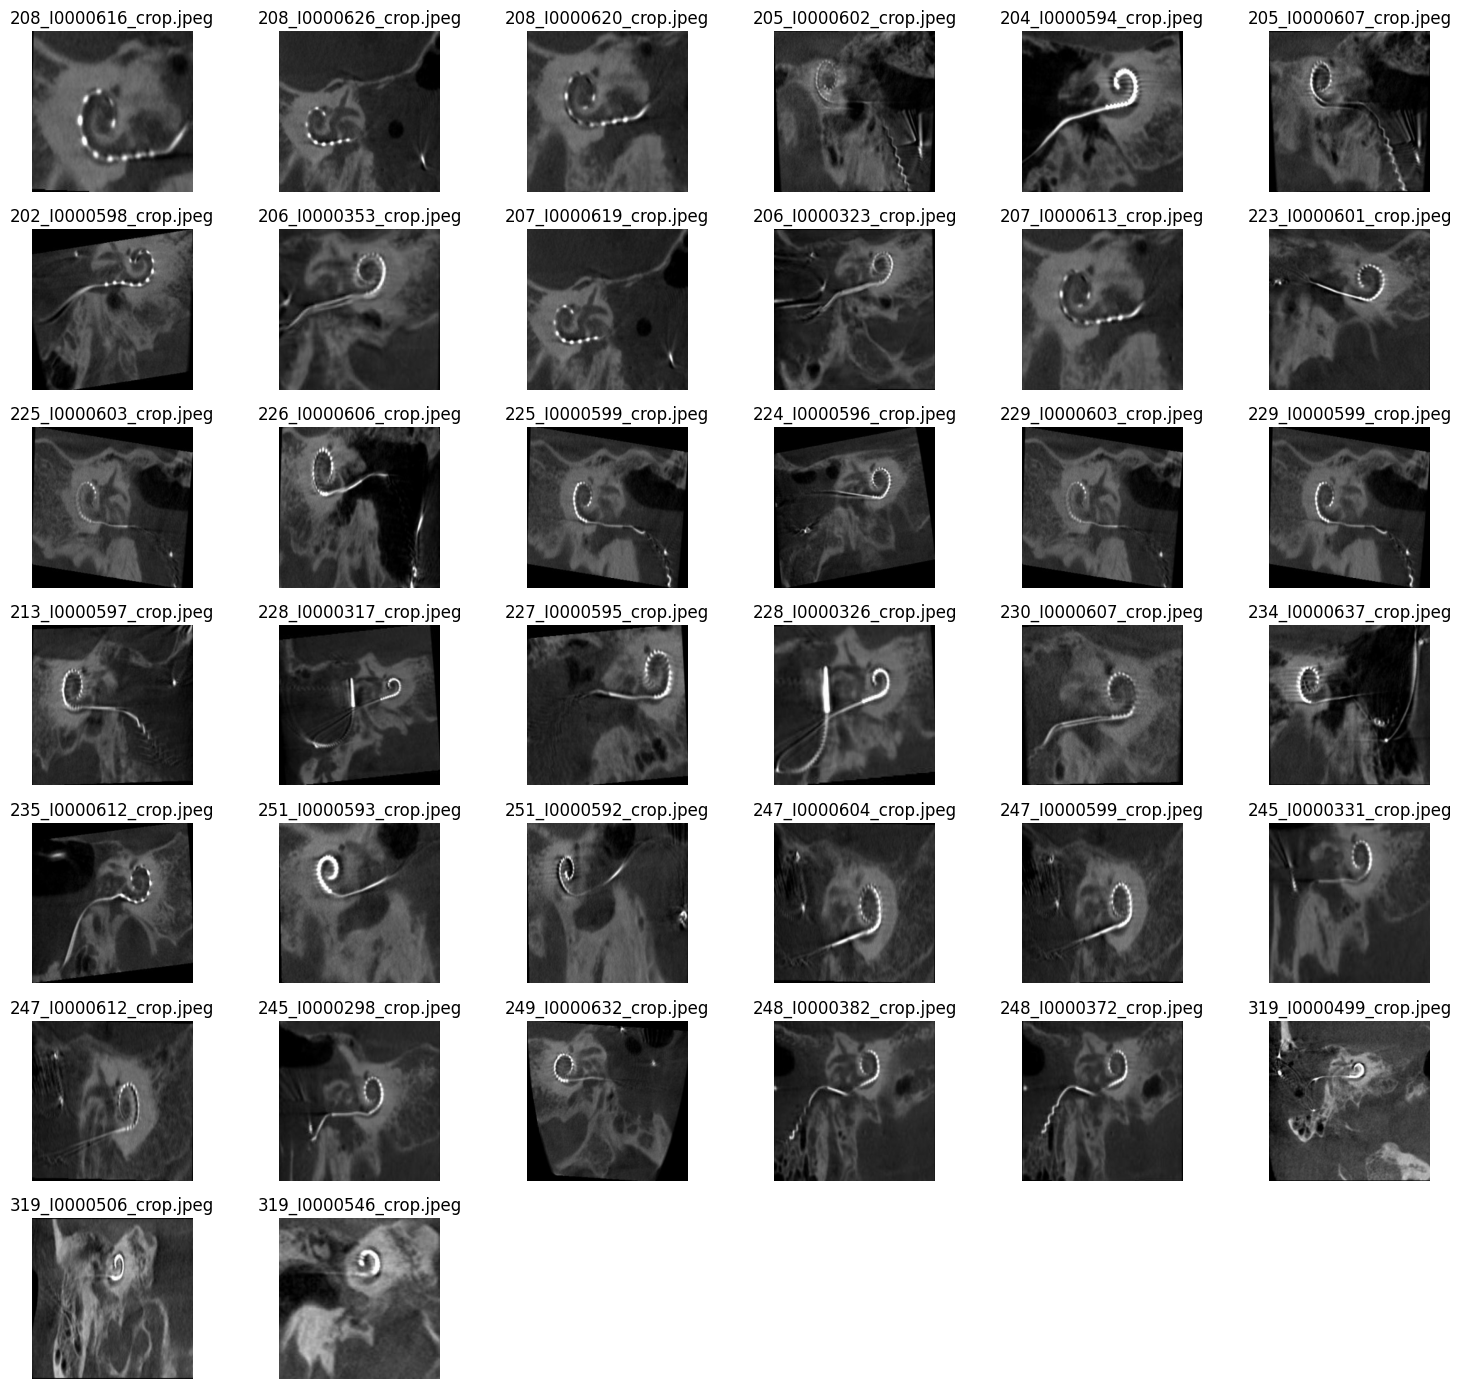

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

# Specify the directory containing the images
folder_path = '/content/drive/MyDrive/MDHDS/Capstone/Test_crop'  # Replace with your folder path

# Find all jpeg images in the directory
image_paths = glob.glob(os.path.join(folder_path, '*.jpeg'))

# Set up the matplotlib figure and axes, based on the number of images
num_images = len(image_paths)
ncols = 6  # Set the number of columns you want for your display
nrows = num_images // ncols + (num_images % ncols > 0)  # Calculate the required number of rows

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 2))  # Adjust the figure size as needed

# Flatten the array of axes, for easy iteration
axs = axs.flatten()

# Loop through images and display them
for ax, img_path in zip(axs, image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(os.path.basename(img_path))  # Set title to the file name

# If there are any remaining axes, turn them off
for ax in axs[num_images:]:
    ax.axis('off')
plt.savefig('/content/drive/MyDrive/MDHDS/Capstone/Test_crop/displayed_images.png')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
# plt.savefig('/content/drive/MyDrive/MDHDS/Capstone/Test_crop/displayed_images.png')


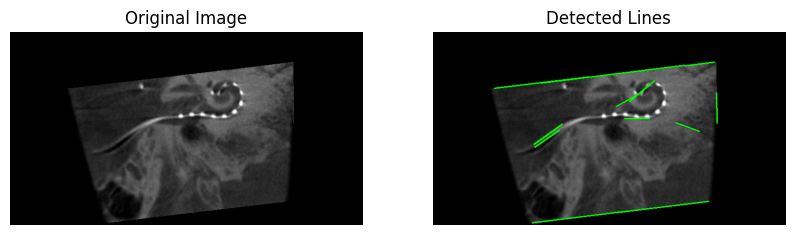

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_cochlear_implant(img_path):
    # Read the image and convert to grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Enhance contrast (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_img = clahe.apply(img)

    # Edge detection
    edges = cv2.Canny(contrast_img, 100, 200)

    # Detect lines (Hough Transform)
    # You might need to adjust the parameters based on your images
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Create a copy of the original image to draw the lines
    img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the original and processed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_with_lines)
    plt.title('Detected Lines')
    plt.axis('off')

    plt.show()

# Example usage
detect_cochlear_implant('/content/drive/MyDrive/MDHDS/Capstone/Test_data_backup/202_I0000598.jpeg')  # Replace with the path to your image


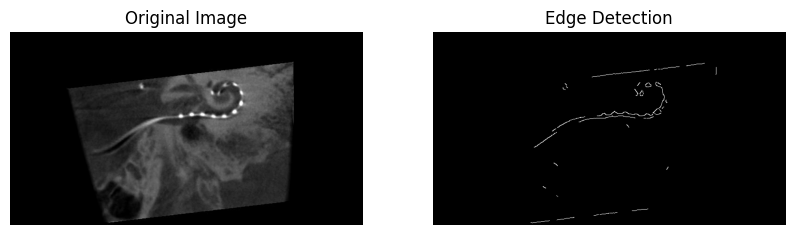

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_and_detect_edges(img_path):
    # Read and preprocess the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(img)
    blurred = cv2.GaussianBlur(contrast_enhanced, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 220, 255)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.show()

# Example usage
preprocess_and_detect_edges('/content/drive/MyDrive/MDHDS/Capstone/Test_data_backup/202_I0000598.jpeg')  # Adjust the path


In [ ]:
import cv2
import os
import glob
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
import numpy as np


def preprocess_and_detect_edges(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Find the maximum pixel value in the image
    max_val = np.max(img)

    # Normalize the pixel values to the range [0, 1]
    max_val = np.max(img)
    normalised_img = (img / max_val * 255).astype(np.uint8)

    # Create a copy of the normalized image for filtering
    fil_img = normalised_img.copy()

    lighter = fil_img >= 200
    darker = fil_img < 200

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.8, 9, 255).astype(np.uint8)


    lighter = fil_img >= 150
    darker = fil_img < 120

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.5, 9, 255).astype(np.uint8)

    lighter = fil_img >= 50
    darker = fil_img < 50

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.5, 9, 255).astype(np.uint8)

    lighter = fil_img >= 50
    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    # img[darker] = np.clip(img[darker] * 0.5, 9, 255).astype(np.uint8)


    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(fil_img)
    blurred = cv2.GaussianBlur(contrast_enhanced, (5, 5), 0)
    edges = cv2.Canny(blurred, 210, 240)

    return img, fil_img, edges

def display_image(index=0):
    img_path = image_paths[index]
    original_img,filtered_img, processed_img = preprocess_and_detect_edges(img_path)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.show()

# Specify the directory containing the images
folder_path = '/content/drive/MyDrive/MDHDS/Capstone/Test_crop'  # Update this path
image_paths = glob.glob(os.path.join(folder_path, '*.jpeg'))
image_count = len(image_paths)

# Create a slider
slider = IntSlider(min=0, max=image_count-1, step=1, value=0, description='Image Index')

# Display the widget
interact(display_image, index=slider)


interactive(children=(IntSlider(value=0, description='Image Index', max=37), Output()), _dom_classes=('widget-…

<function __main__.display_image(index=0)>

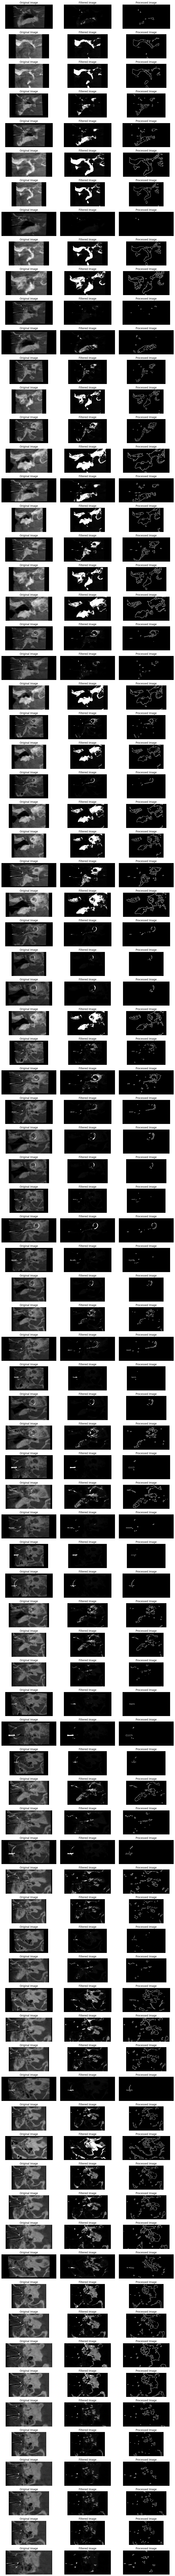

In [ ]:
import cv2
import os
import glob
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
import numpy as np


def preprocess_and_detect_edges(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Find the maximum pixel value in the image
    max_val = np.max(img)

    # Normalize the pixel values to the range [0, 1]
    max_val = np.max(img)
    normalised_img = (img / max_val * 255).astype(np.uint8)

    # Create a copy of the normalized image for filtering
    fil_img = normalised_img.copy()

    lighter = fil_img >= 200
    darker = fil_img < 200

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.8, 9, 255).astype(np.uint8)


    lighter = fil_img >= 150
    darker = fil_img < 120

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.5, 9, 255).astype(np.uint8)

    lighter = fil_img >= 50
    darker = fil_img < 50

    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    fil_img[darker] = np.clip(fil_img[darker] * 0.5, 9, 255).astype(np.uint8)

    lighter = fil_img >= 50
    # # Adjusted intensities
    fil_img[lighter] = np.clip(fil_img[lighter] * 1.5, 0, 255).astype(np.uint8)
    # img[darker] = np.clip(img[darker] * 0.5, 9, 255).astype(np.uint8)


    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(fil_img)
    blurred = cv2.GaussianBlur(contrast_enhanced, (5, 5), 0)
    edges = cv2.Canny(blurred, 210, 240)

    return img, fil_img, edges



def display_all_images(folder_path):
    # Get all the image paths
    image_paths = sorted(glob.glob(os.path.join(folder_path, '*.jpeg')))  # or '*.jpg' depending on your file extensions

    # Calculate the number of images
    num_images = len(image_paths)

    # Set up the figure
    fig, axs = plt.subplots(num_images, 3, figsize=(12, num_images * 2))  # Assuming each row needs 2 inches of height

    # Iterate over all the images
    for i, img_path in enumerate(image_paths):
        original_img, filtered_img, processed_img = preprocess_and_detect_edges(img_path)

        # Original Image
        axs[i, 0].imshow(original_img, cmap='gray')
        axs[i, 0].set_title('Original Image')
        axs[i, 0].axis('off')

        # Filtered Image
        axs[i, 1].imshow(filtered_img, cmap='gray')
        axs[i, 1].set_title('Filtered Image')
        axs[i, 1].axis('off')

        # Edge Image
        axs[i, 2].imshow(processed_img, cmap='gray')
        axs[i, 2].set_title('Processed Image')
        axs[i, 2].axis('off')

    # Adjust the layout
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'display all'))  # Save the figure
    plt.show()

# Specify the directory containing the images
folder_path = '/content/drive/MyDrive/MDHDS/Capstone/Test_206'
display_all_images(folder_path)
